In [ ]:
!pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

!ls gdrive/MyDrive/rawdata

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
test  train  val


In [ ]:
train_dataset = train.flow_from_directory("gdrive/MyDrive/rawdata/train/",
                                         batch_size=100,
                                         class_mode='binary')
train_labels = train_dataset.classes
test_dataset = test.flow_from_directory("gdrive/MyDrive/rawdata/test/",
                                       batch_size=50,
                                       class_mode='binary')
test_labels = test_dataset.classes

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Support Vector Machine Classifier**

In [ ]:
from sklearnex import patch_sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
patch_sklearn()

# Get the training data and labels
X_train, y_train = train_dataset.next()

# Get the validation data and labels
X_test, y_test = test_dataset.next()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the SVM classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)


# Make predictions on the testing set
y_pred = svc_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.56


# **Logistic Regression Classifier**

In [ ]:
from sklearnex import patch_sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
patch_sklearn()

# Get the training data and labels
X_train, y_train = train_dataset.next()

# Get the validation data and labels
X_test, y_test = test_dataset.next()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

model_LR = LogisticRegression(max_iter = 100)
model_LR.fit(X_train, y_train)

y_pred = model_LR.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Decision Tree Classifier**

In [ ]:
from sklearnex import patch_sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
patch_sklearn()

# Get the training data and labels
X_train, y_train = train_dataset.next()

# Get the validation data and labels
X_test, y_test = test_dataset.next()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

model_DTC = DecisionTreeClassifier(criterion='gini',
                                   max_depth=5,
                                   class_weight=None)
model_DTC.fit(X_train, y_train)

y_pred = model_DTC.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.52


/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


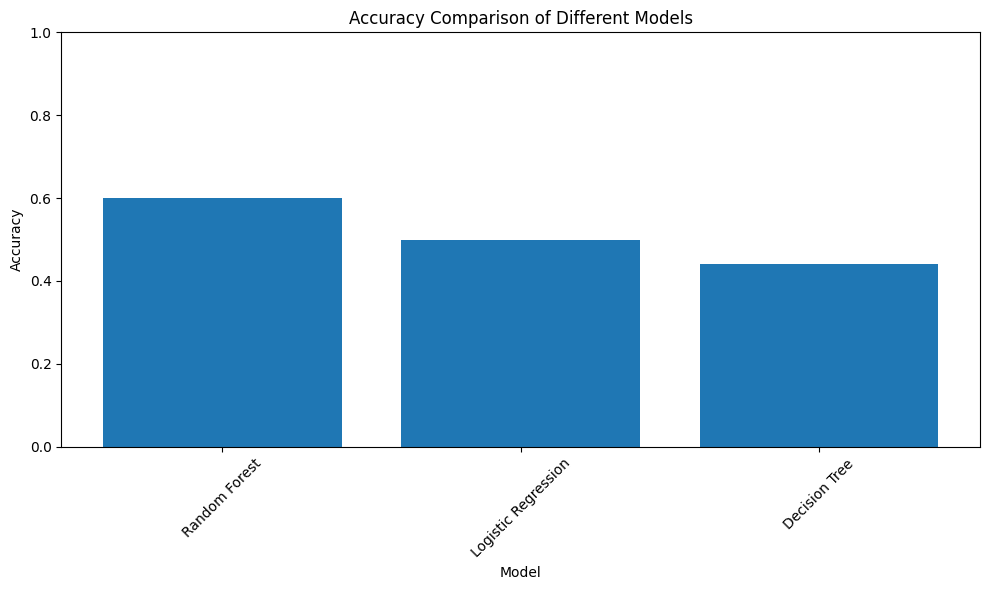

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearnex import patch_sklearn


# Define the models to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter = 100)),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini',
                                   max_depth=30,
                                   class_weight=None)),
    ('Random Forest', RandomForestClassifier())
]

# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# Sort the results by accuracy in descending order
results = sorted(results, key=lambda x: x[1], reverse=True)

# Extract the model names and accuracies for plotting
model_names = [name for name, _ in results]
accuracies = [acc for _, acc in results]

# Plot the accuracy of different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


# Define the class labels
class_labels = ['go', 'stop']  # Replace with your class labels



# Initialize the video capture
cap = cv2.VideoCapture("/content/pexels-george-morina-3087697-3840x2160-30fps.mp4")

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Convert the frame to RGB format
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Resize the frame to the input size required by the models
    input_size = (1280, 720)  # Replace with your model's input size
    resized_frame = cv2.resize(rgb_frame, input_size)

    # Preprocess the image
    img = image.img_to_array(resized_frame)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make predictions using each model
    predictions = []
    for name, model in models:
        pred = model.predict(img)
        predictions.append(pred)

    # Get the class label with the highest prediction probability
    final_predictions = np.mean(predictions, axis=0)
    predicted_class = np.argmax(final_predictions)

    # Display the class label on the frame
    label = class_labels[predicted_class]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Video', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


ValueError: ignored